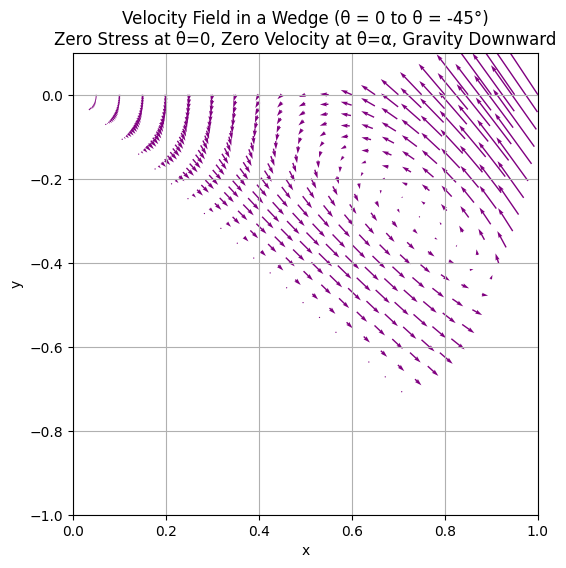

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbolic variables
r, theta, rho, g, mu, alpha, beta = sp.symbols('r theta rho g mu alpha beta')

# Define coefficients to be solved
A, B, C, D = sp.symbols('A B C D')

# Define the assumed stream function, including the nonhomogeneous term for gravity
psi_sym = r**2 * (A * sp.cos(2*theta) + B * sp.sin(2*theta) + C * theta + D) + (rho * g / mu) * r**2 * sp.sin(theta)

# Compute velocity components
u_r_sym = (1/r) * sp.diff(psi_sym, theta)
u_theta_sym = -sp.diff(psi_sym, r)

# Apply boundary conditions at θ = α (zero velocity condition)
eq1_sym = sp.Eq(u_r_sym.subs(theta, alpha), 0)  # u_r = 0 at θ = α
eq2_sym = sp.Eq(u_theta_sym.subs(theta, alpha), 0)  # u_theta = 0 at θ = α

# Compute stress components
p_corrected = -rho * g * r * sp.sin(theta)  # Corrected pressure field (gravity in -y direction)
sigma_rtheta_sym = mu * ((1/r) * sp.diff((1/r) * sp.diff(psi_sym, theta), r) + (1/r**2) * sp.diff(psi_sym, theta, theta))
sigma_thetatheta_sym = -p_corrected + 2 * mu * (1/r) * sp.diff((1/r) * sp.diff(psi_sym, theta), r)

# Apply boundary conditions at θ = 0 (zero stress condition)
eq3_sym = sp.Eq(sigma_rtheta_sym.subs(theta, beta), 0)  # σ_rθ = 0 at θ = 0
eq4_sym = sp.Eq(sigma_thetatheta_sym.subs(theta, beta), 0)  # σ_θθ = 0 at θ = 0

# Solve for A, B, C, D
solution_sym = sp.solve([eq1_sym, eq2_sym, eq3_sym, eq4_sym], (A, B, C, D))

# Substitute solutions into final expressions
psi_final_sym = psi_sym.subs(solution_sym)
u_r_final_sym = (1/r) * sp.diff(psi_final_sym, theta)
u_theta_final_sym = -sp.diff(psi_final_sym, r)

# Convert symbolic expressions to numerical functions using lambdify
u_r_func = sp.lambdify((r, theta, rho, g, mu, alpha, beta), u_r_final_sym, "numpy")
u_theta_func = sp.lambdify((r, theta, rho, g, mu, alpha, beta), u_theta_final_sym, "numpy")

# Numerical values for visualization
rho_val = 1.0  # Density
g_val = 1.0    # Gravity acceleration
mu_val = 1.0   # Viscosity
alpha_val = -np.pi / 4  # -45 degrees in radians
beta_val = np.pi/100  # 1.8 degrees in radians
# beta_val = 0

# Create a polar grid
r_values = np.linspace(0.05, 1, 20)  # Avoid r=0 singularity
theta_values = np.linspace(0, alpha_val, 20)
R, Theta = np.meshgrid(r_values, theta_values)

# Evaluate velocity components using the lambdified functions
Ur = u_r_func(R, Theta, rho_val, g_val, mu_val, alpha_val, beta_val)
Utheta = u_theta_func(R, Theta, rho_val, g_val, mu_val, alpha_val, beta_val)

# Convert to Cartesian coordinates for visualization
X = R * np.cos(Theta)
Y = R * np.sin(Theta)
U_x = Ur * np.cos(Theta) - Utheta * np.sin(Theta)
U_y = Ur * np.sin(Theta) + Utheta * np.cos(Theta)

# Plot the velocity field
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U_x, U_y, scale=None, width=0.003, color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Field in a Wedge (θ = 0 to θ = -45°)\nZero Stress at θ=0, Zero Velocity at θ=α, Gravity Downward')
plt.xlim(0, 1)
plt.ylim(-1, 0.1)
plt.grid(True)
plt.show()
